In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random as rd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data.csv")
genre_data = pd.read_csv("data_by_genres.csv")
year_data = pd.read_csv("data_by_year.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [4]:
data.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


In [5]:
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [45]:
df = data.drop(["mode", "key", "liveness", "speechiness", "release_date"], axis=1)
df.rename(columns={"valence":"happiness", "name":"title"}, inplace=True)

In [47]:
desired_order = ["id", "artists", "title", "year", "duration_ms", "explicit", "popularity", "happiness", "acousticness", "danceability", "energy", "instrumentalness", "loudness", "tempo"]
df = df[desired_order]
df['year'] = df['year'].astype('object')
df.describe()

,duration_ms,explicit,popularity,happiness,acousticness,danceability,energy,instrumentalness,loudness,tempo
count,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,2.309483e+05,0.084575,31.431794,0.528587,0.502115,0.537396,0.482389,0.167010,-11.467990,116.861590
std,1.261184e+05,0.278249,21.826615,0.263171,0.376032,0.176138,0.267646,0.313475,5.697943,30.708533
min,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000
25%,1.698270e+05,0.000000,11.000000,0.317000,0.102000,0.415000,0.255000,0.000000,-14.615000,93.421000
50%,2.074670e+05,0.000000,33.000000,0.540000,0.516000,0.548000,0.471000,0.000216,-10.580000,114.729000
75%,2.624000e+05,0.000000,48.000000,0.747000,0.893000,0.668000,0.703000,0.102000,-7.183000,135.537000
max,5.403500e+06,1.000000,100.000000,1.000000,0.996000,0.988000,1.000000,1.000000,3.855000,243.507000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                170653 non-null  object 
 1   artists           170653 non-null  object 
 2   title             170653 non-null  object 
 3   year              170653 non-null  object 
 4   duration_ms       170653 non-null  int64  
 5   explicit          170653 non-null  int64  
 6   popularity        170653 non-null  int64  
 7   happiness         170653 non-null  float64
 8   acousticness      170653 non-null  float64
 9   danceability      170653 non-null  float64
 10  energy            170653 non-null  float64
 11  instrumentalness  170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  tempo             170653 non-null  float64
dtypes: float64(7), int64(3), object(4)
memory usage: 18.2+ MB


C:\Users\marta\AppData\Local\Temp\ipykernel_21028\1998237738.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['decade'], palette='pastel')


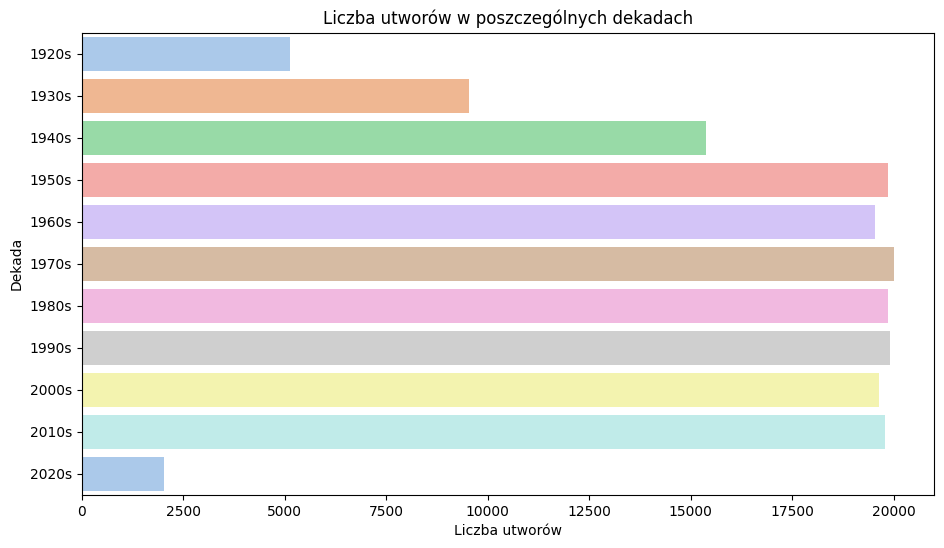

In [49]:
def get_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

df['decade'] = df['year'].apply(get_decade)

plt.figure(figsize=(11, 6))
sns.countplot(df['decade'], palette='pastel')
plt.title("Liczba utworów w poszczególnych dekadach")
plt.xlabel("Liczba utworów")
plt.ylabel("Dekada")
plt.show()

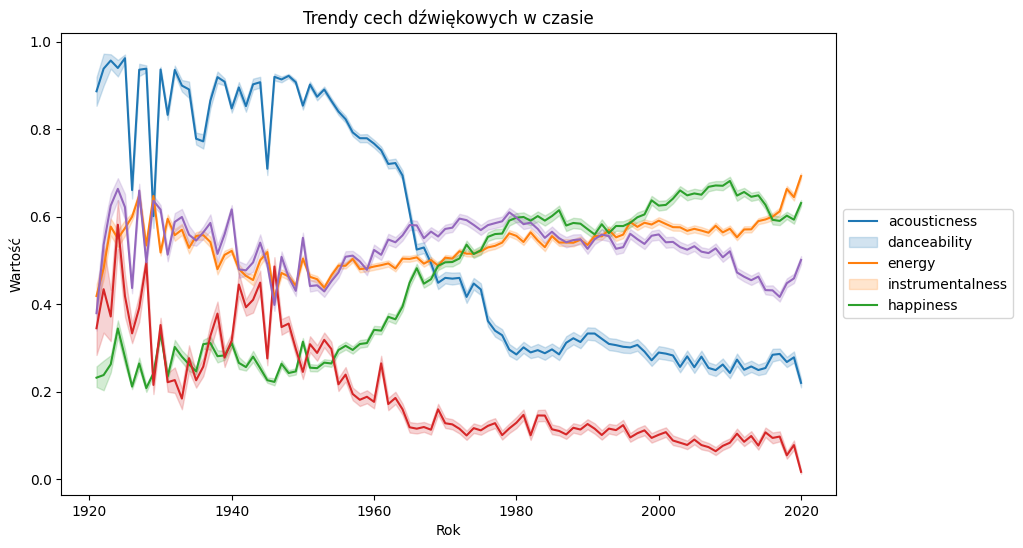

In [50]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'happiness']

plt.figure(figsize=(10, 6))

for feature in sound_features:
    sns.lineplot(df, x='year', y=feature)

plt.legend(labels=sound_features, loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Trendy cech dźwiękowych w czasie')
plt.xlabel('Rok')
plt.ylabel('Wartość')

plt.show()

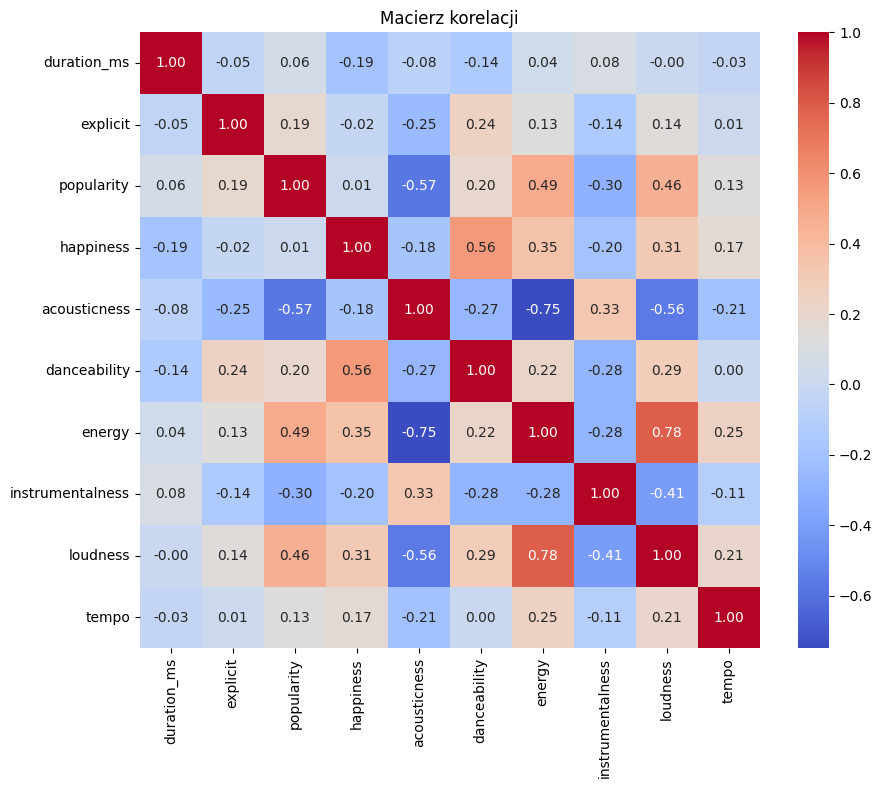

In [105]:
numeric_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Macierz korelacji')
plt.show()

In [76]:
class DataProcessing:
    @staticmethod
    def normalize(x, fill_missing=True, fill_value=0):
        x1 = x.copy()
        values = x1.select_dtypes(include=[np.number])  # Wybierz tylko kolumny numeryczne
        for column in values.columns:
            data = x1[column]
            if fill_missing:
                data = data.fillna(fill_value)  # Uzupełnij brakujące dane wartością domyślną
            min_val = data.min()  # Minimalna wartość w kolumnie
            max_val = data.max()  # Maksymalna wartość w kolumnie
            if min_val == max_val:
                # Jeśli minimalna i maksymalna wartość są takie same, normalizacja nie jest konieczna
                x1[column] = 0
            else:
                # Wykonaj normalizację danych
                x1[column] = (data - min_val) / (max_val - min_val)
        return x1

In [83]:
df_normalized = DataProcessing.normalize(df)

In [84]:
df_normalized.describe()

,duration_ms,explicit,popularity,happiness,acousticness,danceability,energy,instrumentalness,loudness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.041835,0.084575,0.314318,0.528587,0.504131,0.543923,0.482389,0.167010,0.760035,0.479911
std,0.023362,0.278249,0.218266,0.263171,0.377542,0.178277,0.267646,0.313475,0.089233,0.126109
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.030513,0.000000,0.110000,0.317000,0.102410,0.420040,0.255000,0.000000,0.710751,0.383648
50%,0.037485,0.000000,0.330000,0.540000,0.518072,0.554656,0.471000,0.000216,0.773941,0.471153
75%,0.047661,0.000000,0.480000,0.747000,0.896586,0.676113,0.703000,0.102000,0.827140,0.556604
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
class Softset:
    @staticmethod
    def sum_features(sample, X, song):
        # Utwórz macierz numpy z danymi próbki
        sample_data = sample[X].values
        
        # Utwórz wektor numpy z danymi piosenki
        song_data = np.array([song[feature] for feature in X])
        
        # Oblicz sumę element-wise mnożąc wartości próbki przez wartości piosenki i sumując je
        score = np.sum(sample_data * song_data, axis=1)
        
        return score
    
    @staticmethod
    def find_best(softset, X, song):
        scores = Softset.sum_features(softset, X, song)
        
        # Znajdź indeks najwyższego wyniku
        max_index = np.argmax(scores)
        
        return softset.iloc[max_index]

In [100]:
features = ["duration_ms", "explicit", "popularity", "happiness", "acousticness", "danceability", "energy", "instrumentalness", "loudness", "tempo"]

song1 = {"duration_ms": 2, "explicit": 1, "popularity": 1, "happiness": 9, "acousticness": 3, "danceability": 2, "energy": 4, "instrumentalness": 7, "loudness": 5, "tempo": 2}
song2 = {"duration_ms": 6, "explicit": 1, "popularity": 3, "happiness": 2, "acousticness": 1, "danceability": 5, "energy": 1, "instrumentalness": 7, "loudness": 1, "tempo": 1}
song3 = {"duration_ms": 9, "explicit": 0, "popularity": 1, "happiness": 1, "acousticness": 3, "danceability": 4, "energy": 5, "instrumentalness": 9, "loudness": 9, "tempo": 9}
song4 = {"duration_ms": 5, "explicit": 1, "popularity": 0, "happiness": 1, "acousticness": 3, "danceability": 9, "energy": 4, "instrumentalness": 7, "loudness": 2, "tempo": 3}
song5 = {"duration_ms": 3, "explicit": 0, "popularity": 4, "happiness": 1, "acousticness": 3, "danceability": 6, "energy": 4, "instrumentalness": 3, "loudness": 8, "tempo": 7}
song6 = {"duration_ms": 2, "explicit": 1, "popularity": 5, "happiness": 4, "acousticness": 3, "danceability": 2, "energy": 0, "instrumentalness": 0, "loudness": 5, "tempo": 2} 
song7 = {"duration_ms": 5, "explicit": 0, "popularity": 6, "happiness": 1, "acousticness": 1, "danceability": 1, "energy": 1, "instrumentalness": 8, "loudness": 3, "tempo": 2}
song8 = {"duration_ms": 0, "explicit": 0, "popularity": 2, "happiness": 2, "acousticness": 2, "danceability": 4, "energy": 1, "instrumentalness": 9, "loudness": 1, "tempo": 1}
song9 = {"duration_ms": 7, "explicit": 1, "popularity": 10, "happiness": 10, "acousticness": 3, "danceability": 5, "energy": 6, "instrumentalness": 1, "loudness": 7, "tempo": 8}
song10 = {"duration_ms": 3, "explicit": 1, "popularity": 4, "happiness": 2, "acousticness": 1, "danceability": 5, "energy": 9, "instrumentalness": 7, "loudness": 5, "tempo": 9}
song11 = {"duration_ms": 1, "explicit": 0, "popularity": 4, "happiness": 3, "acousticness": 0, "danceability": 1, "energy": 0, "instrumentalness": 7, "loudness": 6, "tempo": 6}

songs = [song1, song2, song3, song4, song5, song6, song7, song8, song9, song10, song11]

for i, song in enumerate(songs, start=1):
    suggestion = Softset.find_best(df_normalized, features, song)
    print(f"Piosenka {i}: {suggestion.artists}, {suggestion.title}")


Piosenka 1: ['Henry Mancini'], Shades Of Sennett
Piosenka 2: ['Daft Punk'], Around the World
Piosenka 3: ['Brownie McGhee'], Drinkin' Wine Spo-Dee-O-Dee
Piosenka 4: ['Edmundo Ros'], Mamabo - Remastered
Piosenka 5: ['Frank Ocean'], In My Room
Piosenka 6: ['Trippie Redd'], Who Needs Love
Piosenka 7: ['Sounds for Life'], Brown Noise for Sleep
Piosenka 8: ["Booker T. & the M.G.'s"], Green Onions
Piosenka 9: ['Anuel AA', 'Bad Bunny'], Hasta Que Dios Diga
Piosenka 10: ['Pharmacist'], North Memphis
Piosenka 11: ['Brad Breeck'], Gravity Falls Main Title Theme (from "Gravity Falls")
